In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [49]:
url='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv'

In [50]:
data=gpd.read_file(url)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   edition        106 non-null    object
 1   start_date     106 non-null    object
 2   winner_name    106 non-null    object
 3   winner_team    106 non-null    object
 4   distance       106 non-null    object
 5   time_overall   106 non-null    object
 6   time_margin    106 non-null    object
 7   stage_wins     106 non-null    object
 8   stages_led     106 non-null    object
 9   height         106 non-null    object
 10  weight         106 non-null    object
 11  age            106 non-null    object
 12  born           106 non-null    object
 13  died           106 non-null    object
 14  full_name      106 non-null    object
 15  nickname       106 non-null    object
 16  birth_town     106 non-null    object
 17  birth_country  106 non-null    object
 18  nationality    106 non-null   

In [52]:
data.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La FranÃ§aise,2428,94.55388888888889,2.9891666666666667,3,6,1.62,60,32,1871-03-03,1957-02-19,NA,The Little Chimney-sweep,Arvier,Italy,Â France
1,2,1904-07-02,Henri Cornet,Conte,2428,96.09861111111111,2.2705555555555557,1,3,NA,NA,19,1884-08-04,1941-03-18,NA,Le rigolo (The joker),Desvres,France,Â France
2,3,1905-07-09,Louis Trousselier,Peugeotâ€“Wolber,2994,NA,NA,5,10,NA,NA,24,1881-06-29,1939-04-24,NA,Levaloy / Trou-trou,Paris,France,Â France
3,4,1906-07-04,RenÃ© Pottier,Peugeotâ€“Wolber,4637,NA,NA,5,12,NA,NA,27,1879-06-05,1907-01-25,NA,NA,Moret-sur-Loing,France,Â France
4,5,1907-07-08,Lucien Petit-Breton,Peugeotâ€“Wolber,4488,NA,NA,2,5,NA,NA,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,PlessÃ©,France,Â France


In [53]:
pd.to_datetime(data['start_date'])

0     1903-07-01
1     1904-07-02
2     1905-07-09
3     1906-07-04
4     1907-07-08
         ...    
101   2015-07-04
102   2016-07-02
103   2017-07-01
104   2018-07-07
105   2019-07-06
Name: start_date, Length: 106, dtype: datetime64[ns]

In [54]:
data['Date']=pd.to_datetime(data['start_date'])

data['Date'].dtype

In [56]:
data['time_margin'] = pd.to_datetime(data['time_margin'], errors='coerce')
data['time_margin'] = pd.to_datetime(data['time_margin'], unit='s')


In [57]:
data.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality,Date
0,1,1903-07-01,Maurice Garin,La FranÃ§aise,2428,94.55388888888889,NaT,3,6,1.62,60,32,1871-03-03,1957-02-19,NA,The Little Chimney-sweep,Arvier,Italy,Â France,1903-07-01
1,2,1904-07-02,Henri Cornet,Conte,2428,96.09861111111111,NaT,1,3,NA,NA,19,1884-08-04,1941-03-18,NA,Le rigolo (The joker),Desvres,France,Â France,1904-07-02
2,3,1905-07-09,Louis Trousselier,Peugeotâ€“Wolber,2994,NA,NaT,5,10,NA,NA,24,1881-06-29,1939-04-24,NA,Levaloy / Trou-trou,Paris,France,Â France,1905-07-09
3,4,1906-07-04,RenÃ© Pottier,Peugeotâ€“Wolber,4637,NA,NaT,5,12,NA,NA,27,1879-06-05,1907-01-25,NA,NA,Moret-sur-Loing,France,Â France,1906-07-04
4,5,1907-07-08,Lucien Petit-Breton,Peugeotâ€“Wolber,4488,NA,NaT,2,5,NA,NA,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,PlessÃ©,France,Â France,1907-07-08


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   edition        106 non-null    object        
 1   start_date     106 non-null    object        
 2   winner_name    106 non-null    object        
 3   winner_team    106 non-null    object        
 4   distance       106 non-null    object        
 5   time_overall   106 non-null    object        
 6   time_margin    0 non-null      datetime64[ns]
 7   stage_wins     106 non-null    object        
 8   stages_led     106 non-null    object        
 9   height         106 non-null    object        
 10  weight         106 non-null    object        
 11  age            106 non-null    object        
 12  born           106 non-null    object        
 13  died           106 non-null    object        
 14  full_name      106 non-null    object        
 15  nickname       106 non-

In [60]:
data['start_date']=pd.to_datetime(data['start_date'])

In [61]:
agg_data=data.pivot(index='edition',columns='winner_name',values='time_overall').reset_index()

In [63]:
data['edition'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106'], dtype=object)

In [64]:
data.shape

(106, 20)

Winning time and Time margin

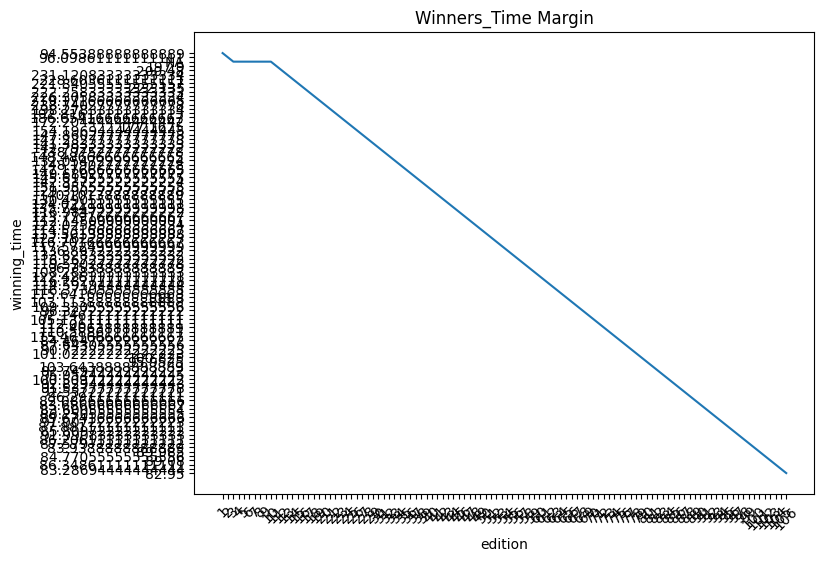

In [81]:
plt.figure(figsize=(8,6))
plt.plot(data['edition'], data['time_overall'])
plt.xlabel('edition')
plt.ylabel('winning_time')
plt.title("Winners_Time Margin")
plt.gca().invert_yaxis()
plt.tick_params(axis='x',labelrotation=45)
plt.show()

The cyclists got better with every edition as seen above,meaning there was an improvement with the editions

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   edition        106 non-null    object        
 1   start_date     106 non-null    datetime64[ns]
 2   winner_name    106 non-null    object        
 3   winner_team    106 non-null    object        
 4   distance       106 non-null    object        
 5   time_overall   106 non-null    object        
 6   time_margin    0 non-null      datetime64[ns]
 7   stage_wins     106 non-null    object        
 8   stages_led     106 non-null    object        
 9   height         106 non-null    object        
 10  weight         106 non-null    object        
 11  age            106 non-null    object        
 12  born           106 non-null    object        
 13  died           106 non-null    object        
 14  full_name      106 non-null    object        
 15  nickname       106 non-

Winners Per Stage Type

C:\Users\user\AppData\Local\Temp\ipykernel_5252\2393826761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stages_led',y='stage_wins', data=data, palette='Set3')


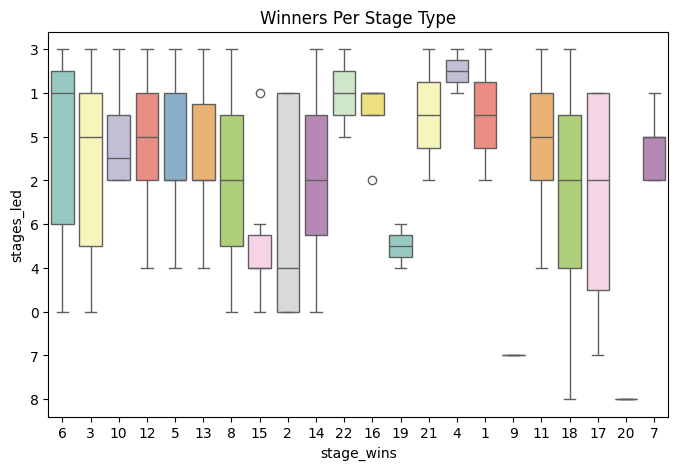

In [82]:
plt.figure(figsize=(8,5))
sns.boxplot(x='stages_led',y='stage_wins', data=data, palette='Set3')
plt.xlabel('stage_wins')
plt.ylabel('stages_led')
plt.title('Winners Per Stage Type')
plt.show()

This chart reveals that winning the Tour de France doesn't require the most stage wins — but rather consistent performance and strategic leadership. Some riders dominate the race with few stage wins by maintaining the yellow jersey, while others rack up stage wins without holding onto the overall lead for long. It highlights the importance of strategy, endurance, and consistency over outright stage victory counts.

Relationship is there Between a winners age and the number of stages led

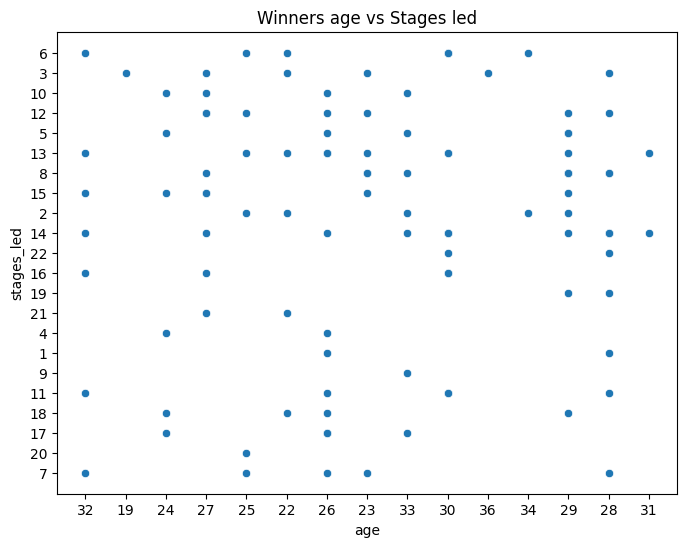

In [84]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='age',
    y='stages_led',
    data=data

)
plt.xlabel('age')
plt.ylabel('stages_led')
plt.title("Winners age vs Stages led")
plt.show()

As seen above,there is no relationship between the age and the stages led

In [73]:
data.head()

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality,Date
0,1,1903-07-01,Maurice Garin,La FranÃ§aise,2428,94.55388888888889,NaT,3,6,1.62,60,32,1871-03-03,1957-02-19,NA,The Little Chimney-sweep,Arvier,Italy,Â France,1903-07-01
1,2,1904-07-02,Henri Cornet,Conte,2428,96.09861111111111,NaT,1,3,NA,NA,19,1884-08-04,1941-03-18,NA,Le rigolo (The joker),Desvres,France,Â France,1904-07-02
2,3,1905-07-09,Louis Trousselier,Peugeotâ€“Wolber,2994,NA,NaT,5,10,NA,NA,24,1881-06-29,1939-04-24,NA,Levaloy / Trou-trou,Paris,France,Â France,1905-07-09
3,4,1906-07-04,RenÃ© Pottier,Peugeotâ€“Wolber,4637,NA,NaT,5,12,NA,NA,27,1879-06-05,1907-01-25,NA,NA,Moret-sur-Loing,France,Â France,1906-07-04
4,5,1907-07-08,Lucien Petit-Breton,Peugeotâ€“Wolber,4488,NA,NaT,2,5,NA,NA,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,PlessÃ©,France,Â France,1907-07-08


Most recent winnings against winners Nationality

In [74]:
most_recent=data.loc[data['start_date'].idxmax()]
most_recent

edition                               106
start_date            2019-07-06 00:00:00
winner_name                   Egan Bernal
winner_team                    Team Ineos
distance                             3349
time_overall                        82.95
time_margin                           NaT
stage_wins                              0
stages_led                              2
height                               1.75
weight                                 60
age                                    22
born                           1997-01-13
died                                   NA
full_name        Egan Arley Bernal GÃ³mez
nickname                               NA
birth_town                        BogotÃ¡
birth_country                    Columbia
nationality                    Â Colombia
Date                  2019-07-06 00:00:00
Name: 105, dtype: object

C:\Users\user\AppData\Local\Temp\ipykernel_5252\3353110667.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nationality', y='nationality', data=data ,palette="viridis")


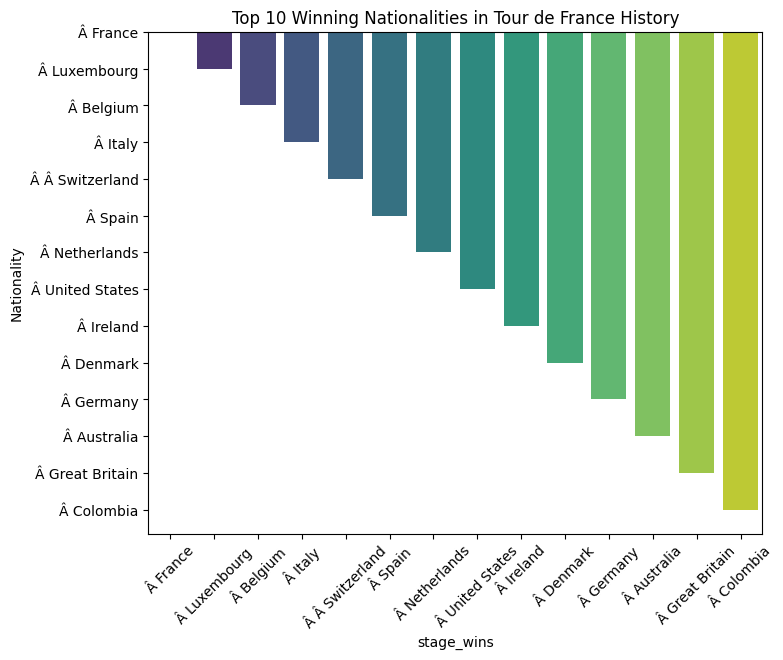

In [78]:
plt.figure(figsize=(8, 6))
sns.barplot(x='nationality', y='nationality', data=data ,palette="viridis")
plt.title("Top 10 Winning Nationalities in Tour de France History")
plt.xlabel("stage_wins")
plt.ylabel("Nationality")
plt.tight_layout()
plt.tick_params(axis='x',labelrotation=45)
plt.show()